In [1]:
pip install import-ipynb

Note: you may need to restart the kernel to use updated packages.


In [5]:
import sqlite3
# using the import-ipynb library
import import_ipynb
import csv
# using a local file
import scraping as sc
import import_ipynb
import twitter as tw
import import_ipynb
import analysis as an

In [ ]:
sc.scraping_to_csv()

In [ ]:
# importing a csv into the database
def csv_scraping_db():
    # connectiong to the database (create it if needed) and get the cursor
    conn = sqlite3.connect('book_scraping.db')
    cursor = conn.cursor()
    
    # creating a table in the database
    cursor.execute('DROP TABLE IF EXISTS books')    
    cursor.execute('CREATE TABLE IF NOT EXISTS books (title, rank, price, link, availibility);')
    
    # opening the csv file
    with open('books.csv', 'r') as file:
        # get a dictionary of the file
        line = csv.DictReader(file)
        list_ = [(i['title'], i['rank'], i['price'], i['link'], i['availibility']) for i in line]
    
    # add values to the database
    cursor.executemany('INSERT INTO books (title, rank, price, link, availibility) VALUES (?, ?, ?, ?, ?)', list_)
    
    # save and close the database
    conn.commit()
    conn.close()

In [ ]:
csv_scraping_db()

In [ ]:
def csv_twitter_db(db_name, csv_name, table_name):
    # connectiong to the database (create it if needed) and get the cursor
    conn = sqlite3.connect(db_name)
    cursor = conn.cursor()
    
    # creating a table in the database
    cursor.execute('DROP TABLE IF EXISTS ' + table_name)    
    cursor.execute('CREATE TABLE IF NOT EXISTS ' + table_name + '(tweets, likes INTEGER, time)')
    
    # opening the csv file
    with open(csv_name, 'r', encoding='UTF-8') as file:
        # get a dictionary of the file
        line = csv.DictReader(file)
        list_ = [(i['tweets'], i['likes'], i['time']) for i in line]
    
    # add values to the database
    cursor.executemany('INSERT INTO ' + table_name + '(tweets, likes, time) VALUES (?, ?, ?)', list_)
    
    # save and close the database
    conn.commit()
    conn.close()
    return

In [7]:
# scraping data of Art of War in Twitter
def scraping_twitter():
    tw.tweets_csv('"The Song of Achilles"', 'the_song_of_achilles.csv')
    tw.tweets_csv('"The Art of War" -filter:retweets', 'the_art_of_war.csv')
    tw.tweets_csv('"The Book Thief"', 'the_book_thief.csv')
    tw.tweets_csv('"The Picture of Dorian Gray"', 'the_picture_of_dorian_gray.csv')

scraping_twitter()

<string>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
# get the csv files into the database
csv_twitter_db('book_scraping.db', 'the_art_of_war.csv', 'the_art_of_war')
csv_twitter_db('book_scraping.db', 'the_song_of_achilles.csv', 'the_song_of_achilles')
csv_twitter_db('book_scraping.db', 'the_book_thief.csv', 'the_book_thief')
csv_twitter_db('book_scraping.db', 'the_picture_of_dorian_gray.csv', 'the_picture_of_dorian_gray')

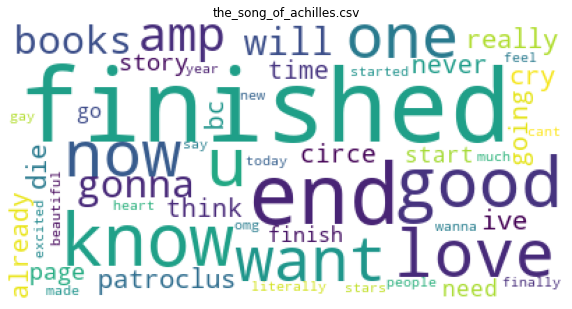

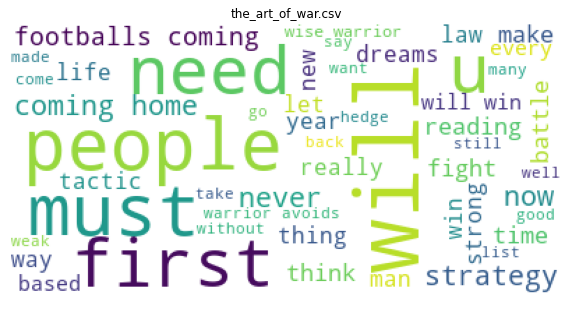

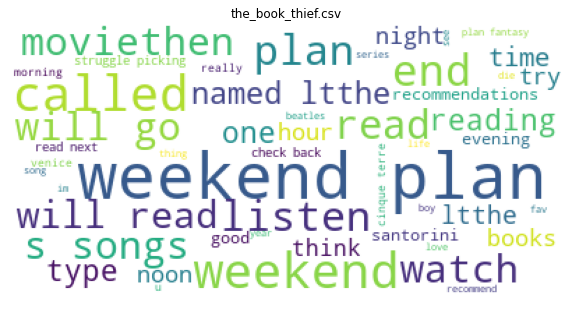

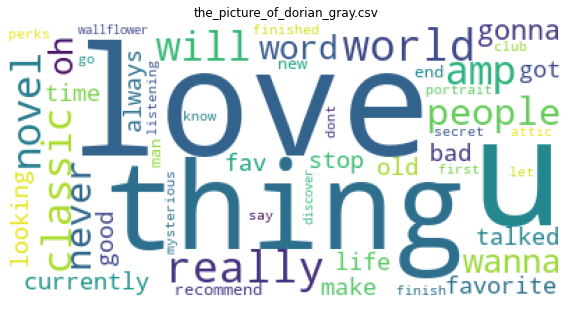

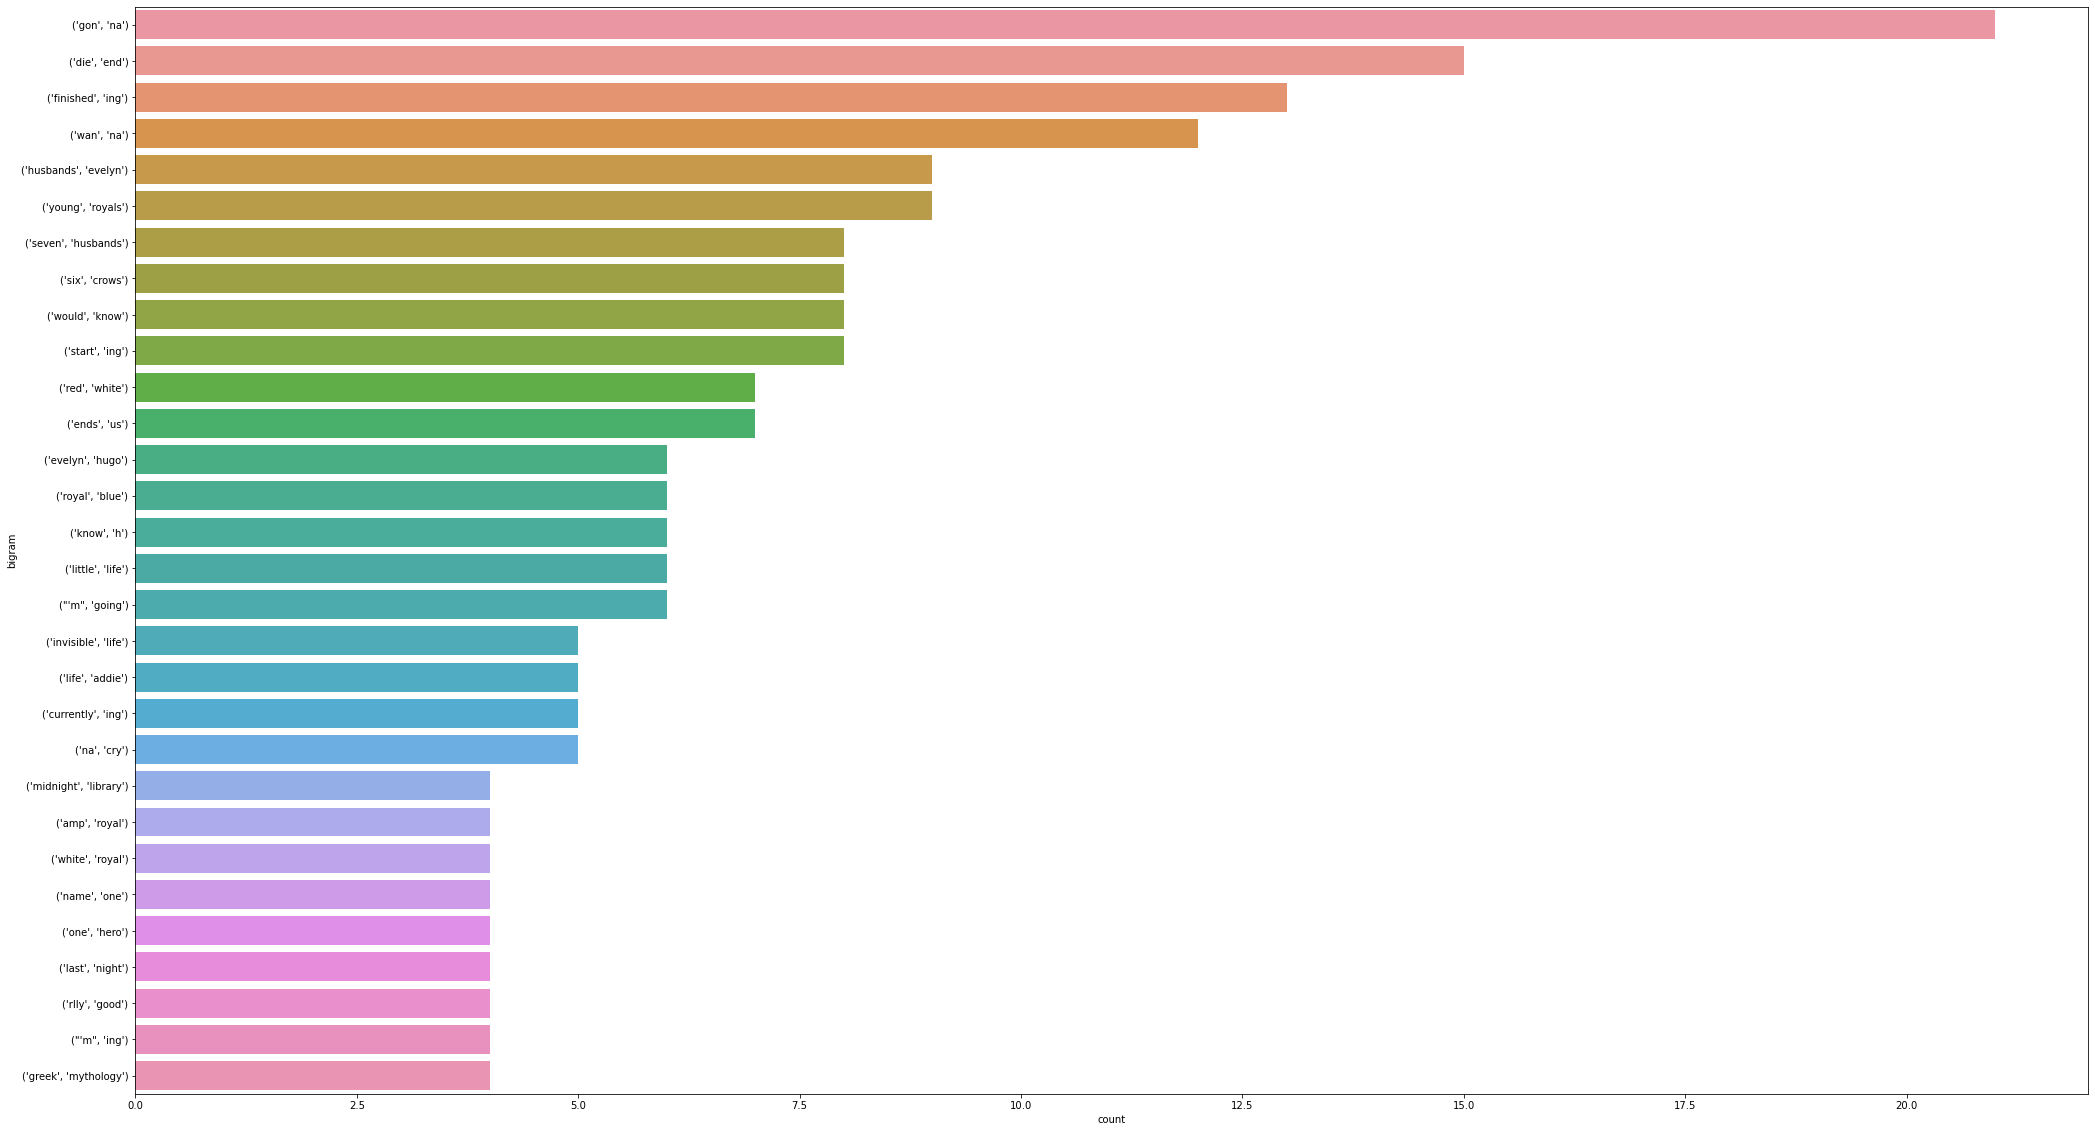

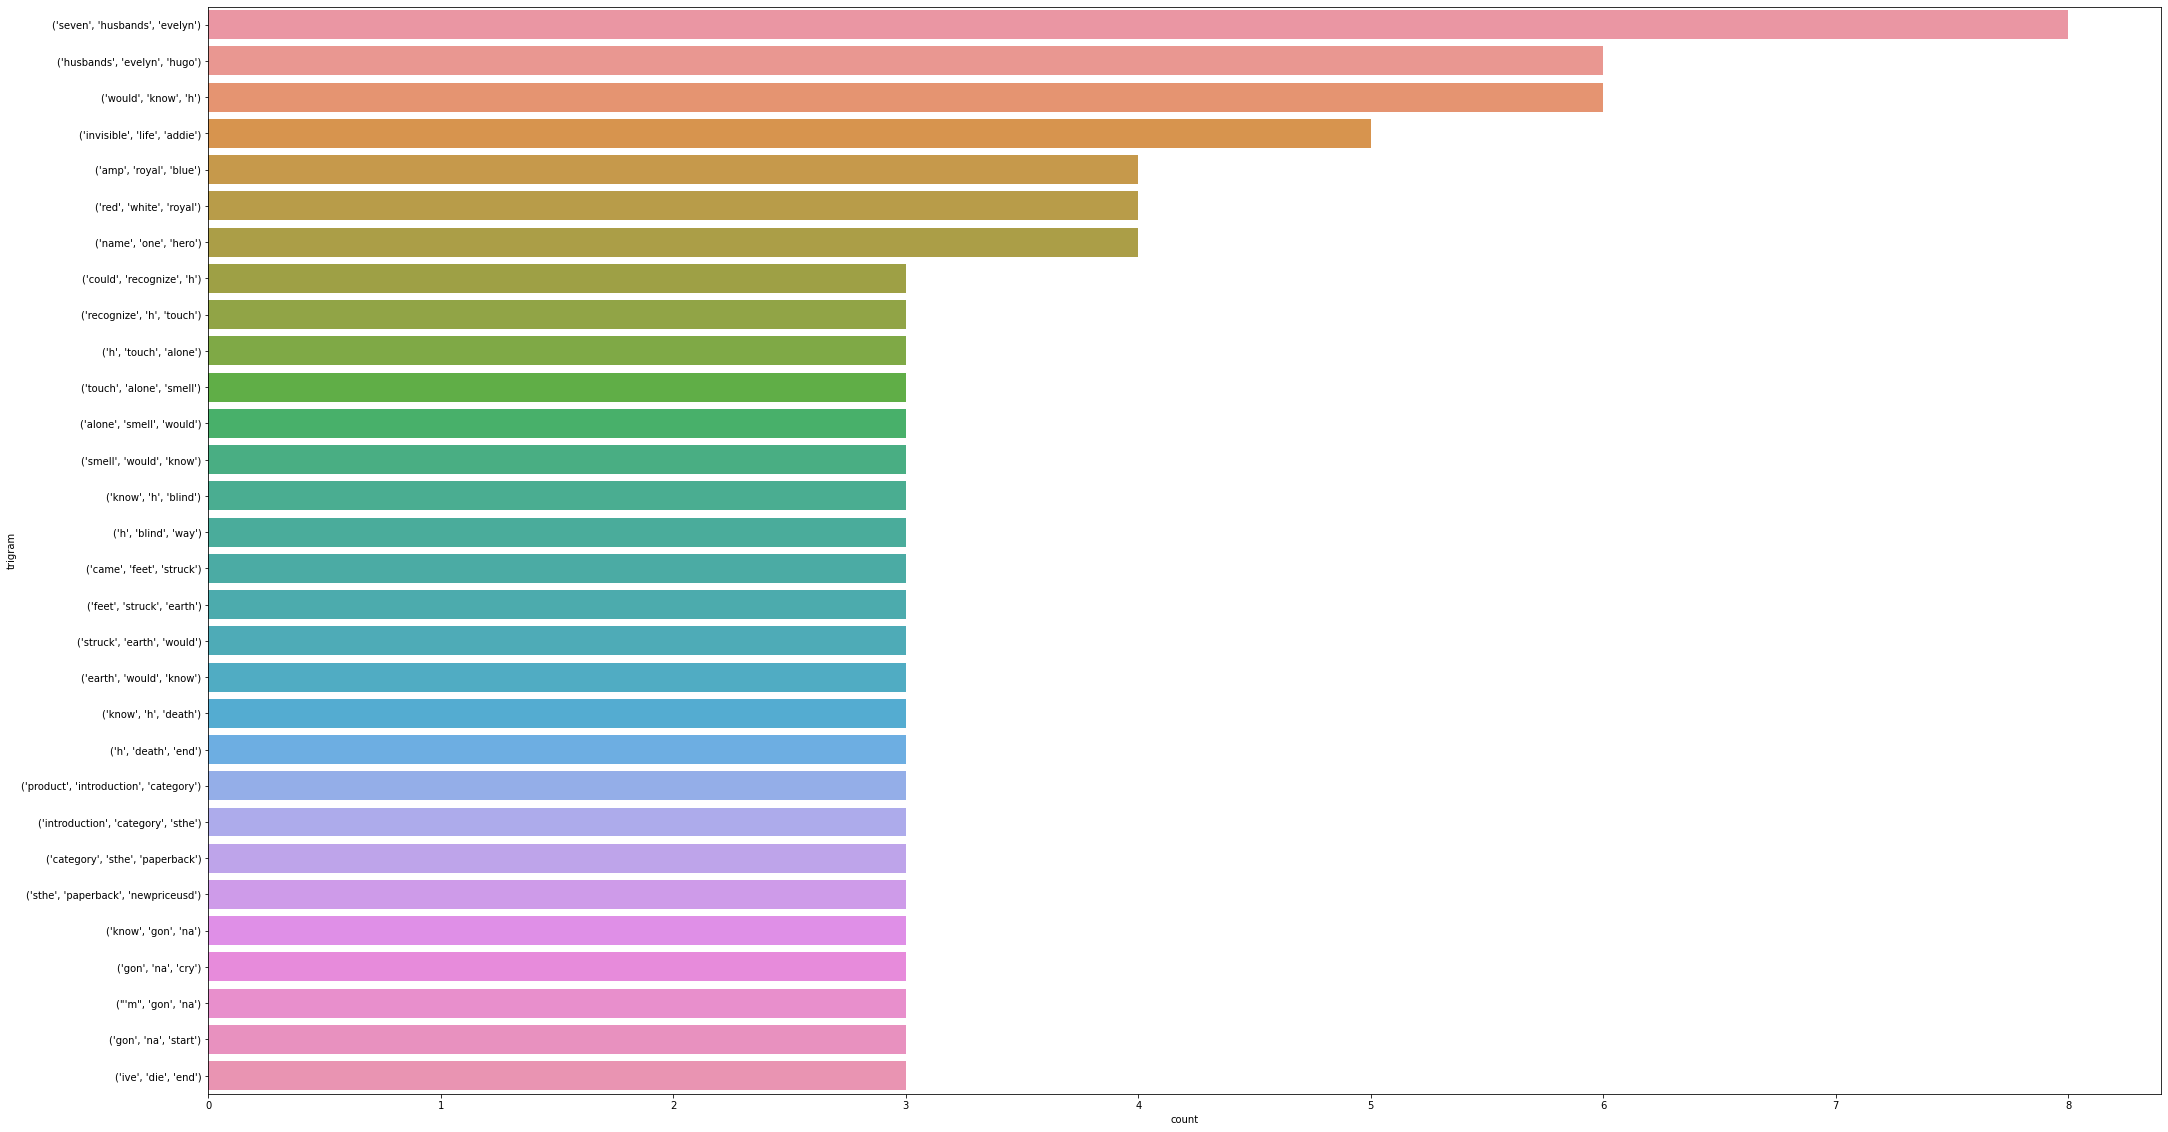

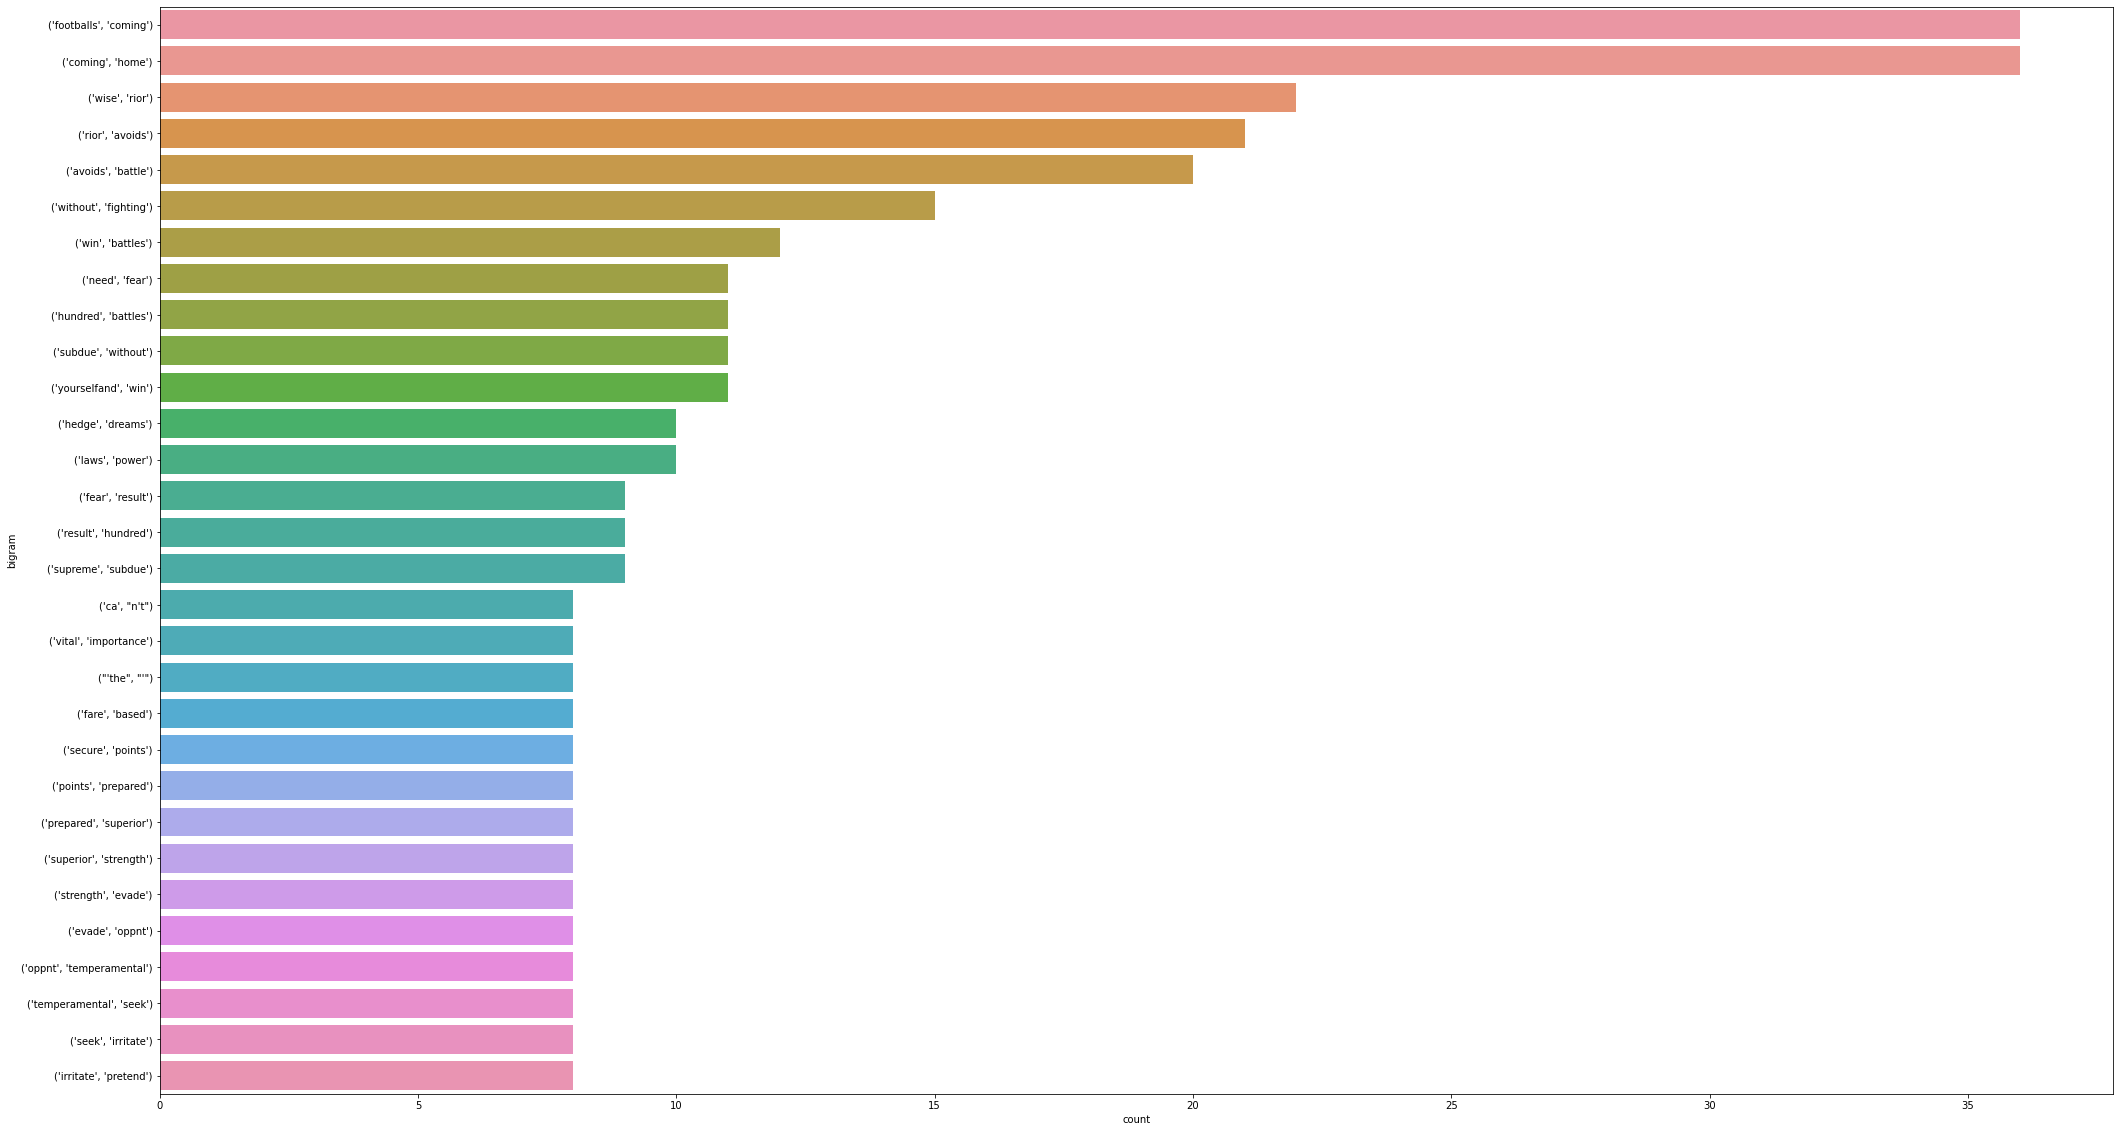

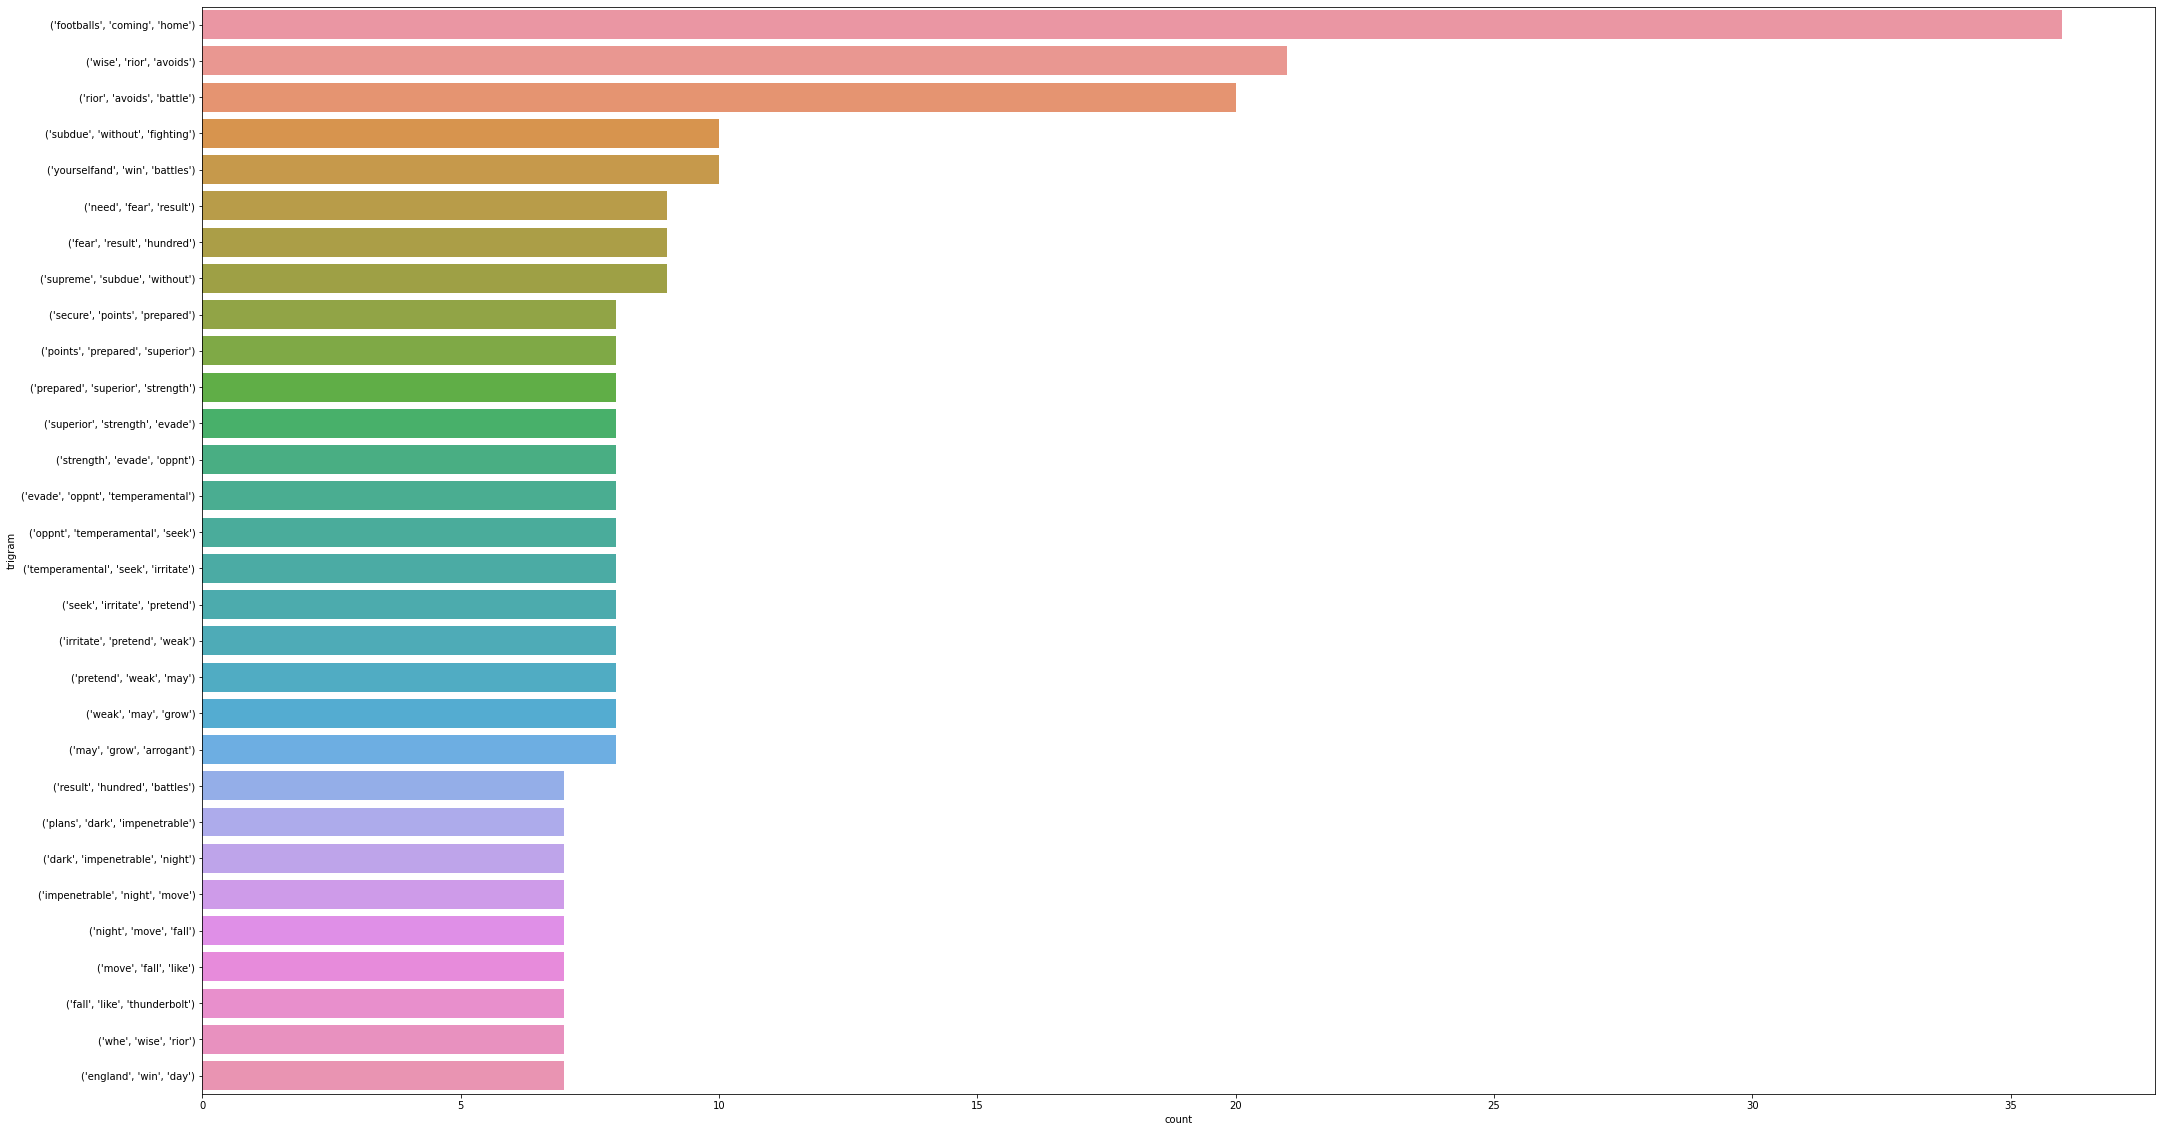

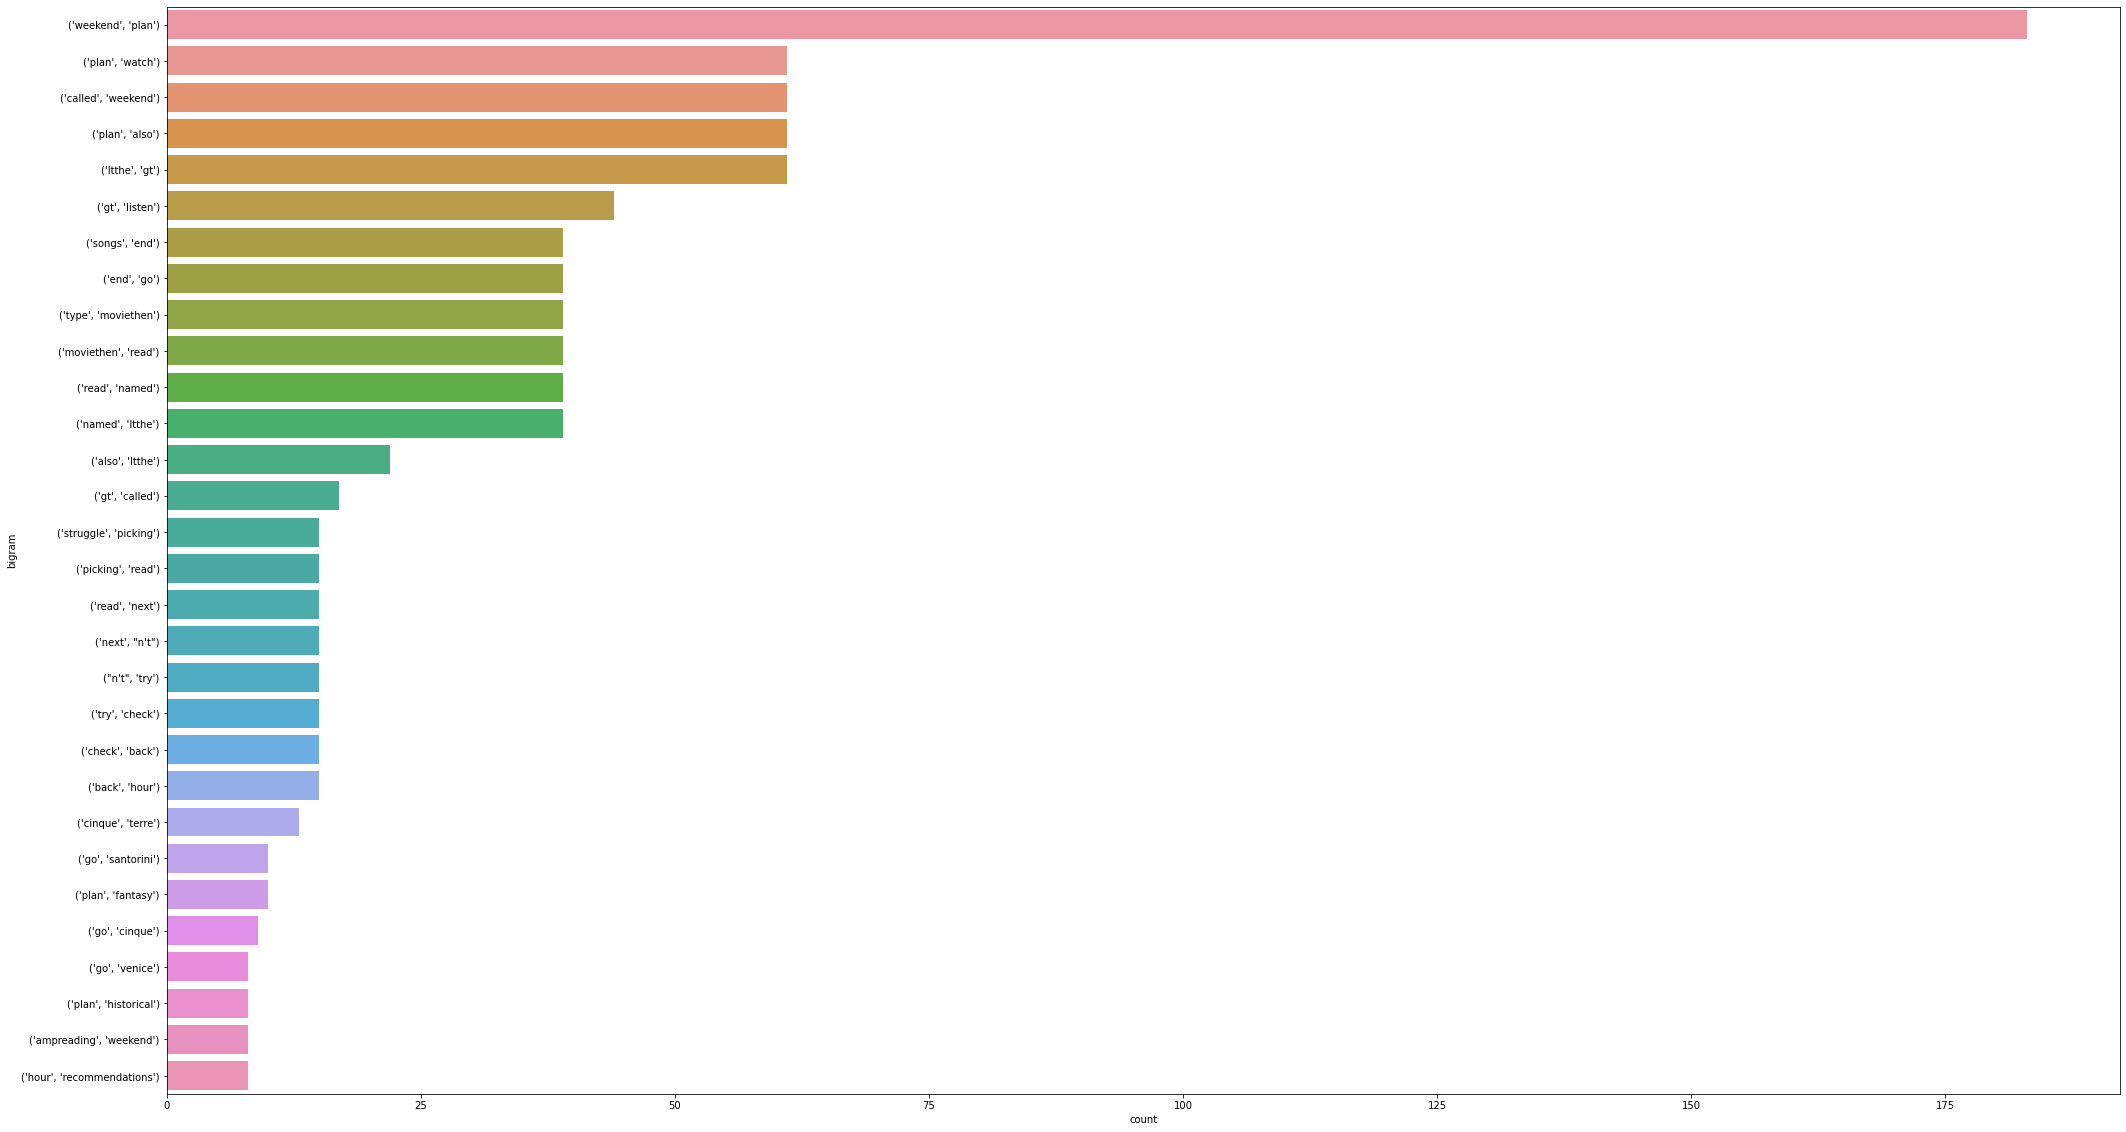

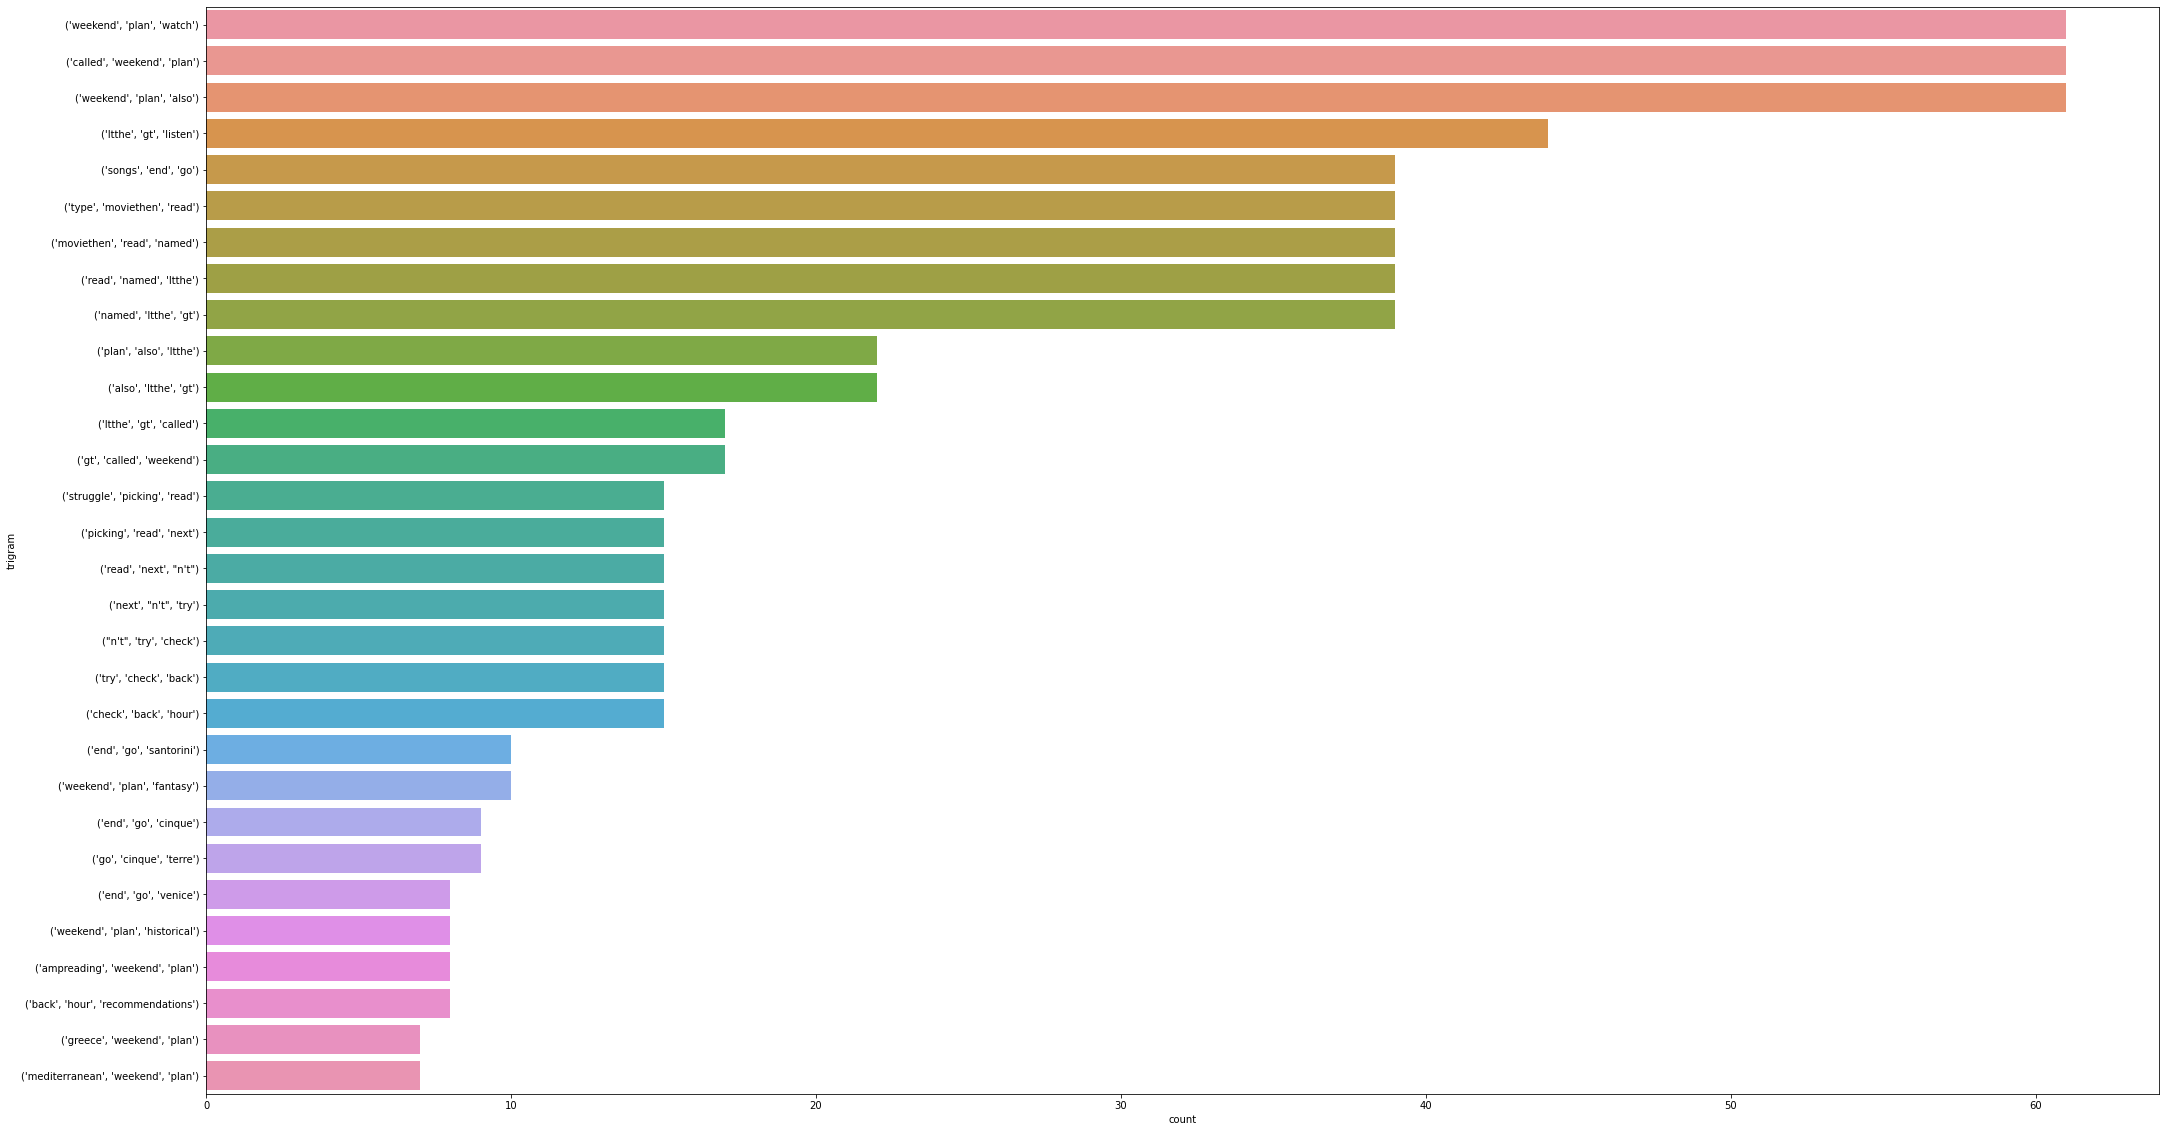

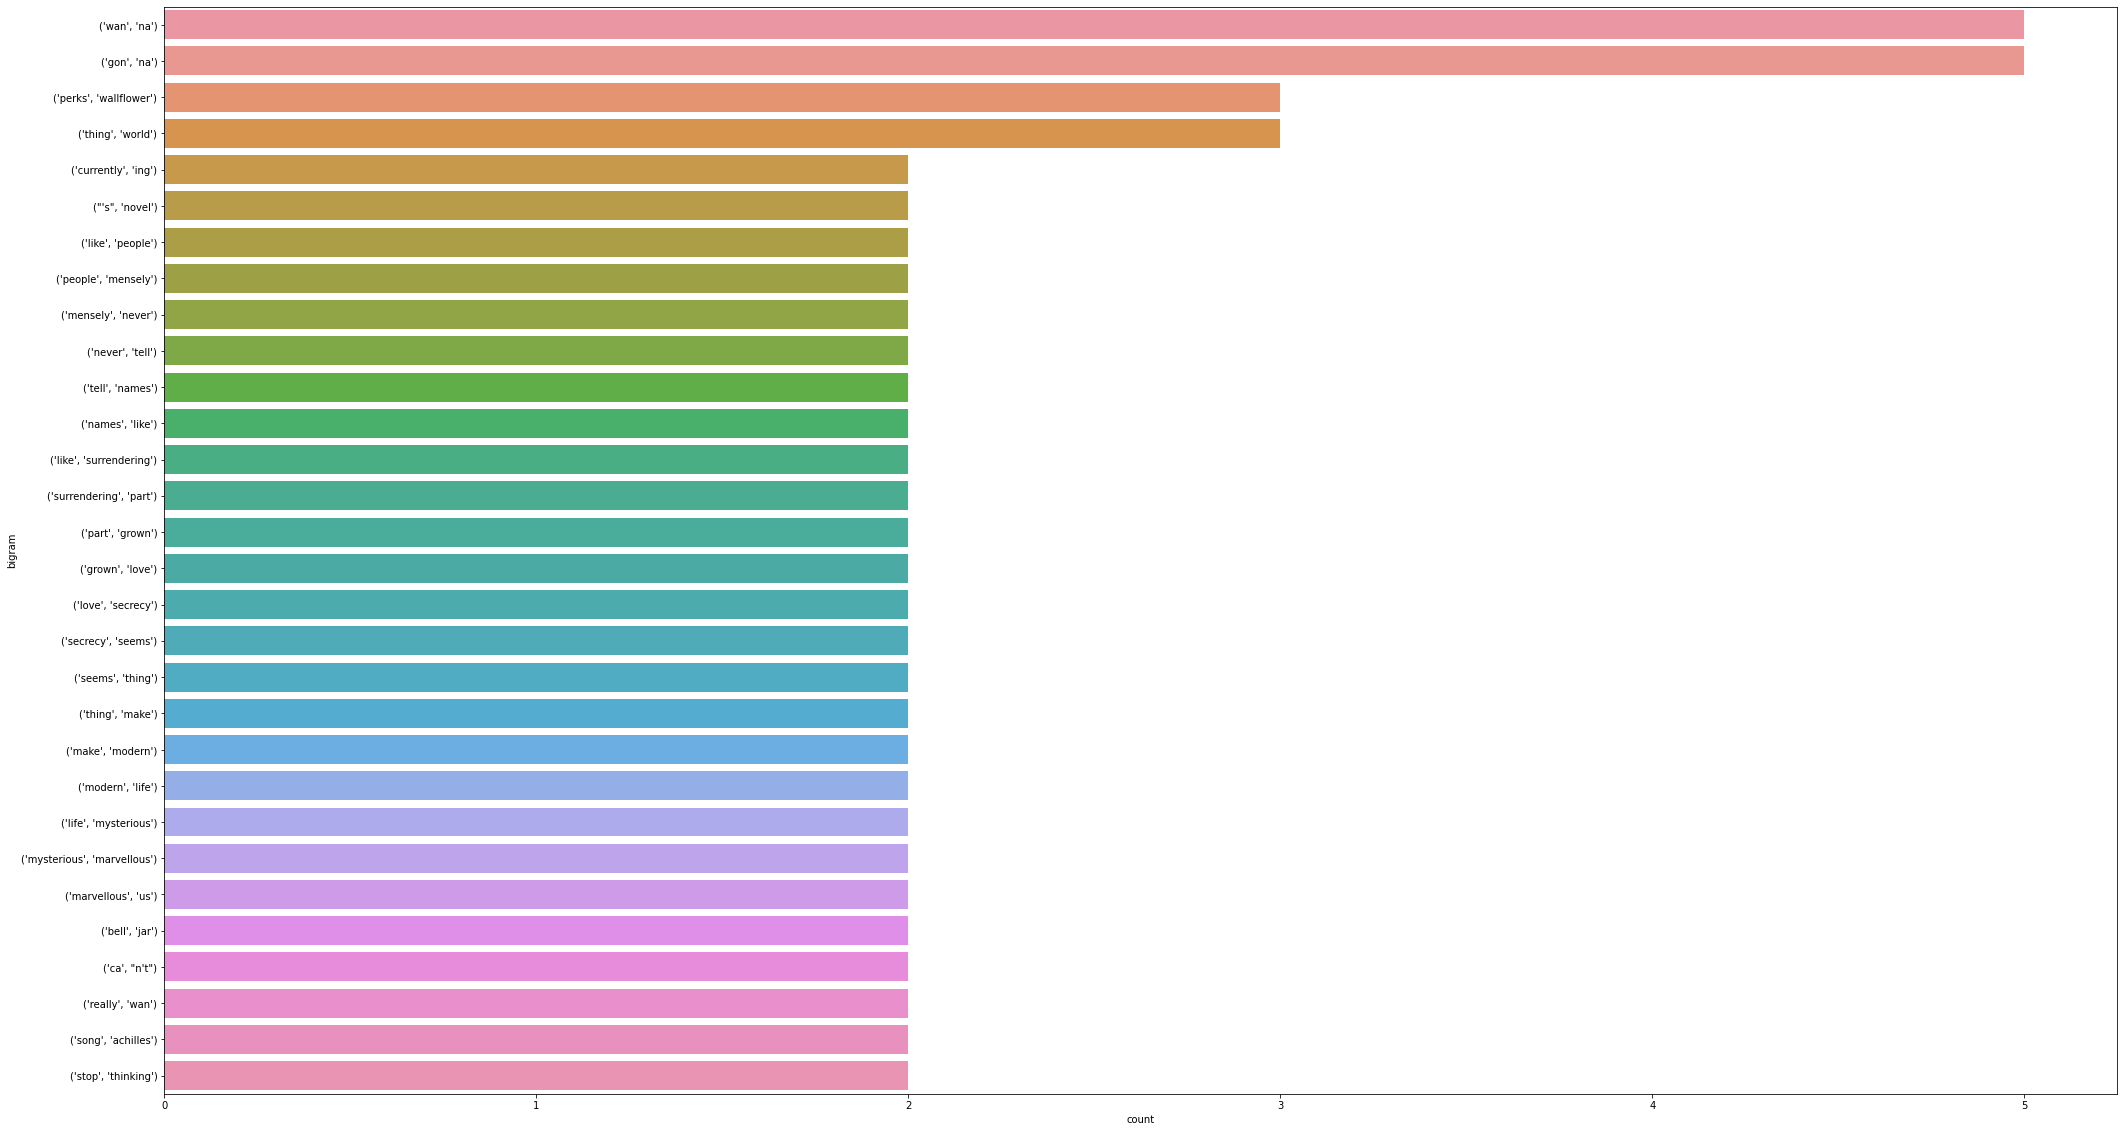

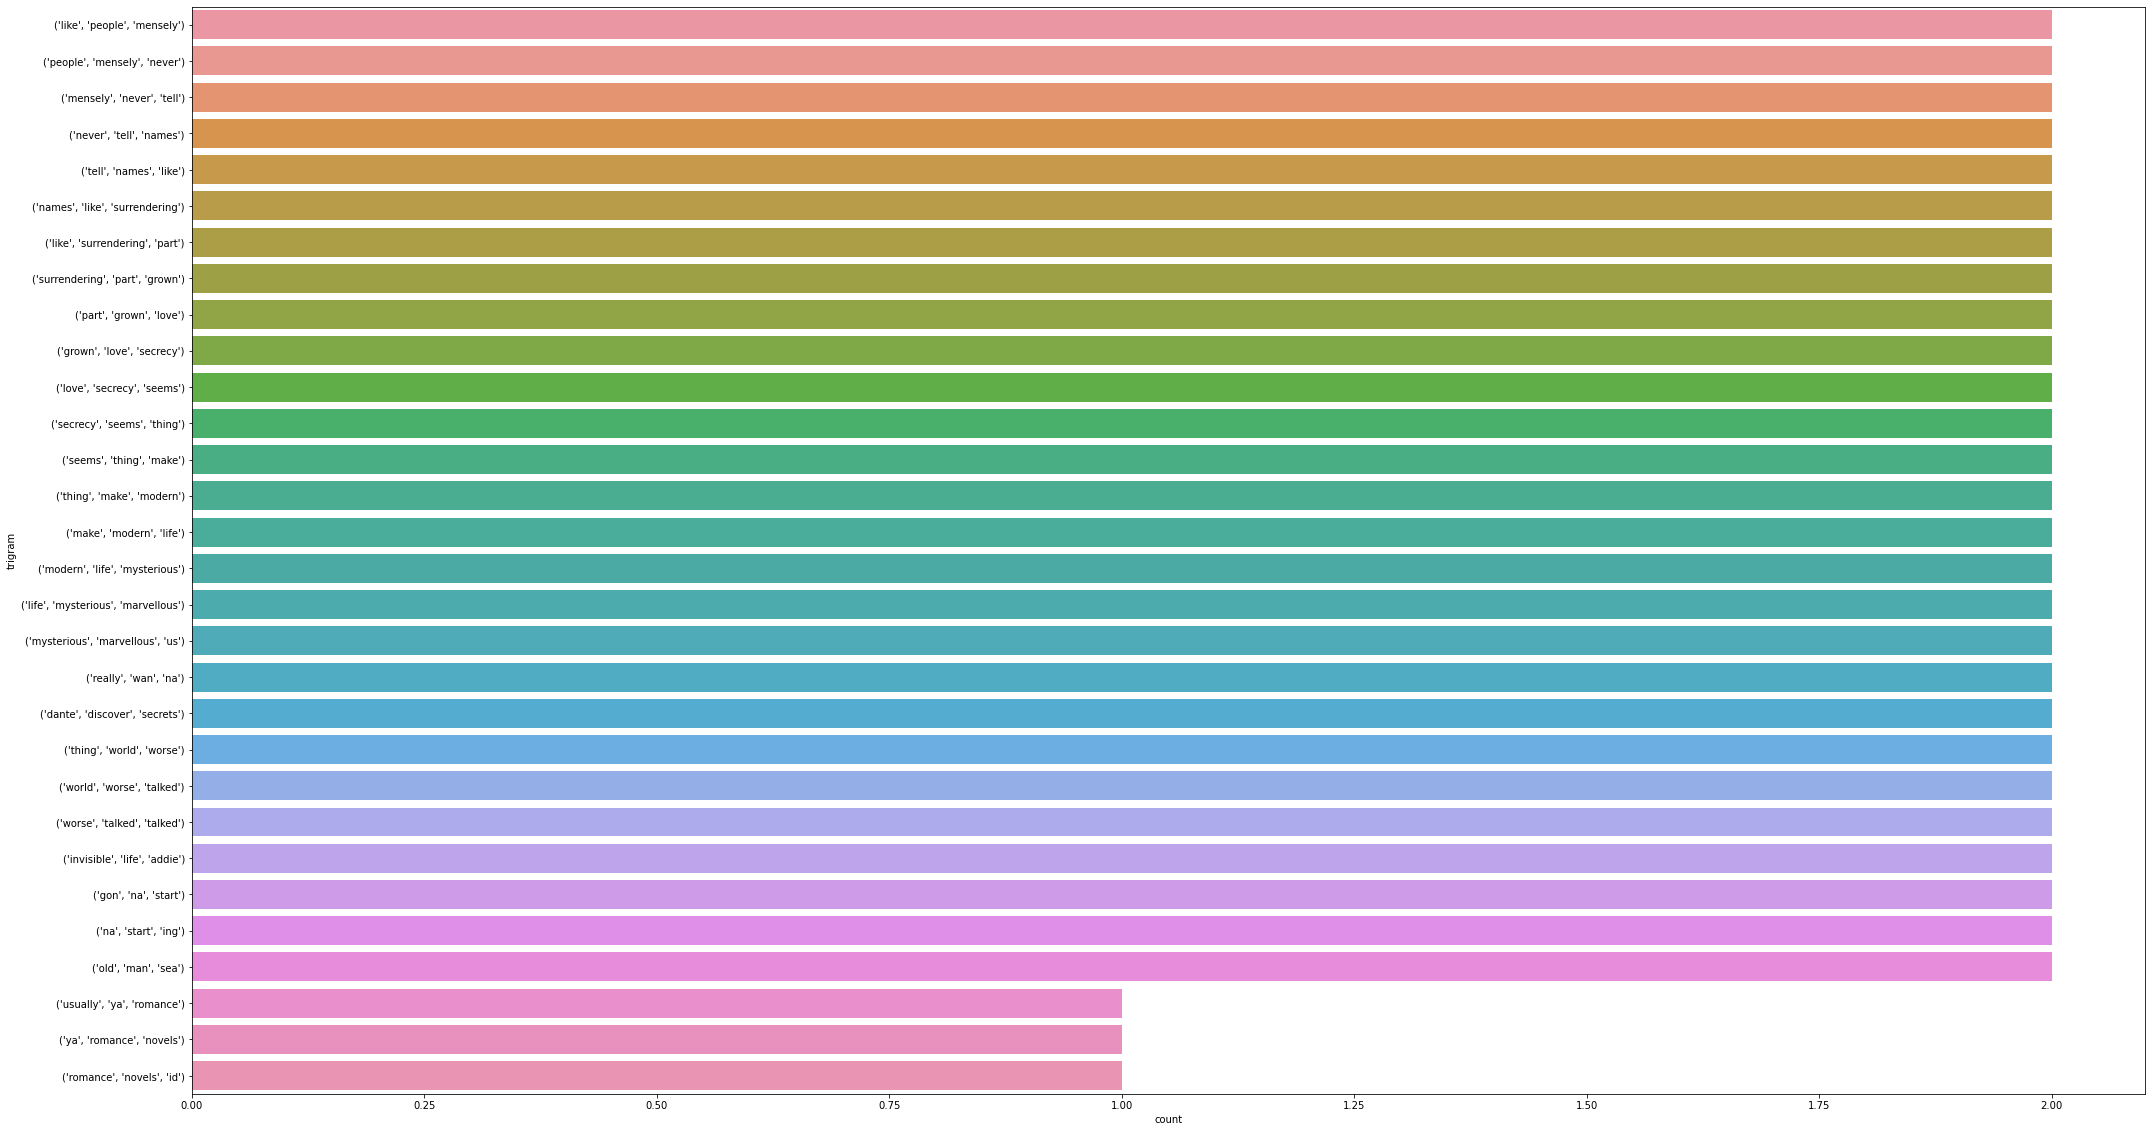

In [6]:
an.global_analysis()